In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
DEBUG=False

In [2]:
%run ./nb_core/root_dirs.ipynb
setup_syspath_disentangle(DEBUG)
%run ./nb_core/disentangle_imports.ipynb

DATA_ROOT:	 /group/jug/ashesh/data/
CODE_ROOT:	 /home/ashesh.ashesh/


/localscratch/miniforge3/envs/usplit_vdi/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [39]:
# from disentangle.core.tiff_reader import load_tiff
# noisy = load_tiff('/group/jug/ashesh/data/nikola_denoising_input/uSplit_14022025_lowSNR_channel0.tif')
# clean = load_tiff('/home/ashesh.ashesh/training/N2V/2404/26/uSplit_14022025_lowSNR_channel0.tif').astype(np.uint16)
# _, ax = plt.subplots(figsize=(10,5),ncols=2)
# ax[0].imshow(noisy[0,:400,-400:])
# ax[1].imshow(clean[0,:400,-400:])
# import seaborn as sns
# import matplotlib.pyplot as plt
# sns.kdeplot(noisy[::20].flatten(), label='noisy')
# sns.kdeplot(clean[::20].flatten(), label='clean')
# plt.legend()
# mask = clean == 100
# sns.kdeplot(noisy[mask])

In [31]:
nmodel_dir = '/home/ashesh.ashesh/training/noise_model/2404/26'
# nmodel_dir = '/home/ashesh.ashesh/training/noise_model/2402/61'

histnoisemodel_fpath = None
gmmnoisemodel_fpath = None
for fname in os.listdir(nmodel_dir):
    if fname.startswith('HistNoiseModel'):
        assert histnoisemodel_fpath is None
        histnoisemodel_fpath = os.path.join(nmodel_dir, fname)
    elif fname.startswith('GMMNoiseModel'):
        assert gmmnoisemodel_fpath is None
        gmmnoisemodel_fpath = os.path.join(nmodel_dir, fname)
print(gmmnoisemodel_fpath)
print(histnoisemodel_fpath)

/home/ashesh.ashesh/training/noise_model/2404/26/GMMNoiseModel_nikola_denoising_input-uSplit_14022025_lowSNR_channel0__6_4_Clip0.0-1.0_Sig0.125_UpNone_Norm0_bootstrap.npz
/home/ashesh.ashesh/training/noise_model/2404/26/HistNoiseModel_nikola_denoising_input-uSplit_14022025_lowSNR_channel0__Norm0_Bins128_bootstrap.npy


In [32]:
from disentangle.nets.gmm_noise_model import GaussianMixtureNoiseModel
from disentangle.nets.hist_noise_model import HistNoiseModel

# gmmnoisemodel_fpath = '/home/ashesh.ashesh/training/noise_model/2402/62/GMMNoiseModel_CCPs-GT_all.mrc__6_4_Clip0.0-1.0_Sig0.125_UpNone_Norm0_bootstrap.npz'
# histnoisemodel_fpath = os.path.join(os.path.dirname(gmmnoisemodel_fpath), 'HistNoiseModel_CCPs-GT_all.mrc__Norm0_Bins128_bootstrap.npy')
# datadir = '/group/jug/ashesh/data/ventura_gigascience/actin-60x-noise2-highsnr.tif' if 'actin' in os.path.basename(gmmnoisemodel_fpath) else '/group/jug/ashesh/data/ventura_gigascience/mito-60x-noise2-highsnr.tif'


In [33]:
nmodel_params = np.load(gmmnoisemodel_fpath)
gmm_model = GaussianMixtureNoiseModel(params=nmodel_params)
histdata = np.load(histnoisemodel_fpath)
hist_model = HistNoiseModel(histdata)
bins = histdata.shape[-1]

[GaussianMixtureNoiseModel] min_sigma: 0.125


In [34]:
histdata[1,25:50,0]

array([130.5390625, 132.640625 , 134.7421875, 136.84375  , 138.9453125,
       141.046875 , 143.1484375, 145.25     , 147.3515625, 149.453125 ,
       151.5546875, 153.65625  , 155.7578125, 157.859375 , 159.9609375,
       162.0625   , 164.1640625, 166.265625 , 168.3671875, 170.46875  ,
       172.5703125, 174.671875 , 176.7734375, 178.875    , 180.9765625])

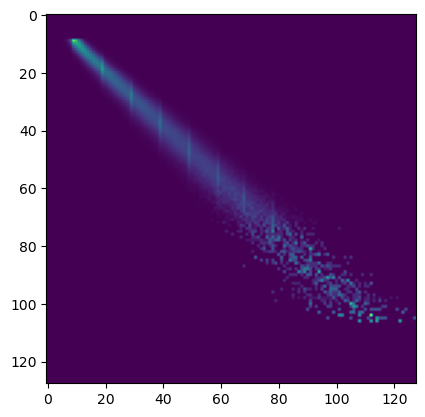

In [35]:
plt.imshow(histdata[0])

205.14453125

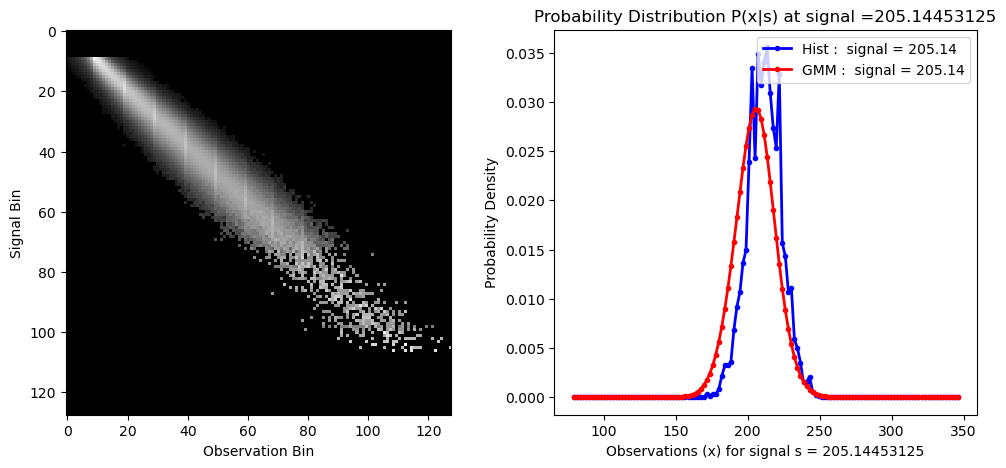

In [38]:
from disentangle.utils import plotProbabilityDistribution
signalBinIndex= 60
data_dict = plotProbabilityDistribution(signalBinIndex=signalBinIndex, 
                            histogramNoiseModel=hist_model,
                            gaussianMixtureNoiseModel=gmm_model,
                            device='cpu')
data_dict['gmm']['x'][data_dict['gmm']['p'].argmax()]

In [ ]:
params = gmm_model.getGaussianParameters(signalBinIndex)
np.sqrt(np.sum((np.array(params[-6:])) * np.array(params[6:12])**2))

3.3717802

In [ ]:
# for i in range(histdata.shape[1]):
#     assert np.std(histdata[1][i]) < 1e-7
#     assert np.std(histdata[2][i]) < 1e-7

In [ ]:
# bin_val = (histdata[1] + histdata[2])/2
# bin_val = bin_val[:,0]
# binsize = np.mean(histdata[2] - histdata[1])
# bin_pdf = histdata[0]/binsize

In [ ]:
# from scipy.optimize import curve_fit
# import math
# import numpy as np

# def gaus(x, mu,sigma):
#     out = np.exp(-(x-mu)**2/(2*sigma**2)) * 1/(sigma*np.sqrt(2*math.pi))
#     # print(out.shape, out.min(), out.max())
#     return out

# def sigmoid(x):
#   return 1 / (1 + math.exp(-x))

In [ ]:
# index = 90
# x = bin_val
# y = bin_pdf[index]

# mean =bin_val[index]
# sigma = sum(y*(x-mean)**2)/len(y)

# popt,pcov = curve_fit(gaus,
#                       x,
#                       y,
#                       p0=[x[index],sigma])


In [ ]:
# pcov

In [ ]:
# popt

In [ ]:
# plt.plot(bin_val,bin_pdf[index],'b+:',label='data')
# plt.plot(bin_val,gaus(bin_val,*popt),'ro:',label='fit')
# plt.legend()
# plt.title('Fig. 3 - Fit for Time Constant')
# plt.xlabel('Time (s)')
# plt.ylabel('Voltage (V)')
# plt.show()

In [ ]:

from disentangle.nets.hist_gmm_noise_model import HistGMMNoiseModel

In [ ]:
nm = HistGMMNoiseModel(histdata)
nm.fit()

In [ ]:

max_signal = hist_model.maxv.item()
min_signal = hist_model.minv.item()
n_bin = int(hist_model.bins.item())

histBinSize = (max_signal - min_signal) / n_bin
querySignal_numpy = (signalBinIndex / float(n_bin) * (max_signal - min_signal) + min_signal)


In [ ]:
nm._params = nm._params.cpu()

104.26953125

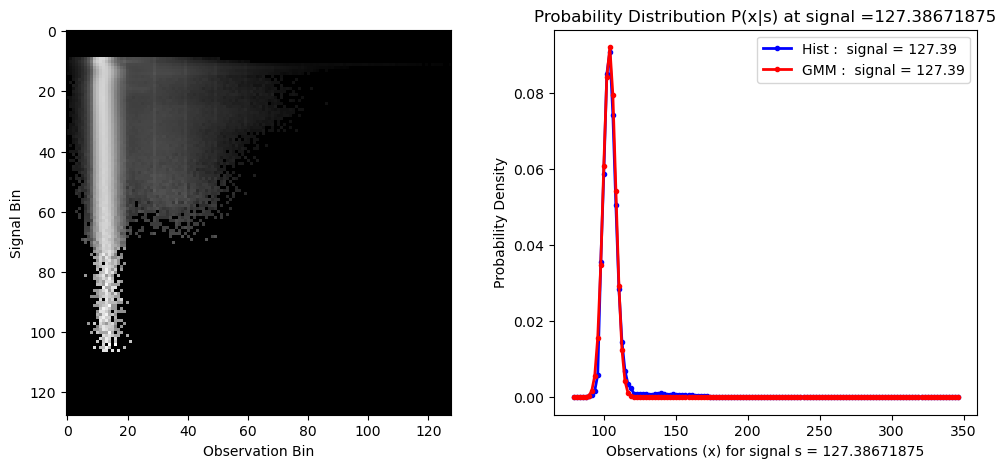

In [ ]:
signalBinIndex = 23
data_dict = plotProbabilityDistribution(signalBinIndex=signalBinIndex, 
                            histogramNoiseModel=hist_model,
                            gaussianMixtureNoiseModel=nm,
                            device='cpu')
data_dict['gmm']['x'][data_dict['gmm']['p'].argmax()]

In [ ]:
nm._min_valid_index

8

In [ ]:
nm._params[42]

tensor([105.1231,   4.5991])

In [ ]:
nm._binsize

2.1015625